# 1-D Toy Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

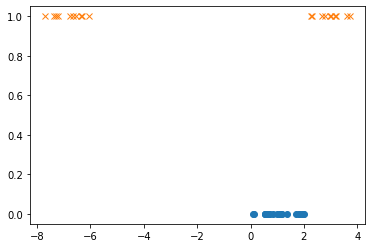

In [2]:
x_0 = np.random.rand(20,1)*2
x_1_1 = np.random.rand(10,1)*2+2
x_1_2 = np.random.rand(10,1)*2-8
x_1 = np.concatenate((x_1_1,x_1_2))

data = np.concatenate((x_0,x_1))
target = np.concatenate((np.zeros((20,1))-1,np.ones((20,1))))

plt.plot(x_0,[0]*x_0.shape[0],'o')
plt.plot(x_1,[1]*x_1.shape[0],'x')
plt.show()

In [3]:
def covariance_function(x1,x2,length,signal_var,noise_var):
    size1 = x1.shape[0]
    size2 = x2.shape[0]
    out = np.zeros((size1,size2))
    for i in range(size1):
        for j in range(size2): 
            xp = x1[i]
            xq = x2[j]
            out[i,j] =signal_var * math.exp(-1/2*(abs(xp-xq)**2)/length)+noise_var*(i==j)
    return out

## Laplace Approximation

In [4]:
def logit_function(x):
    return 1/(1+np.exp(-x))

In [5]:
f = np.zeros_like(target)
K = covariance_function(data,data,1,1,0.1)
K_inv = np.linalg.inv(K)

In [6]:
error = 100
while error>1e-6:
    pi = logit_function(f)
    W = np.zeros((f.shape[0],f.shape[0]))
    temp = (pi*(1-pi)).reshape(-1).tolist()
    np.fill_diagonal(W,temp)
    dp = (target+1)/2 - pi
    cov = np.linalg.inv(K_inv+W)
    f_new = np.matmul(cov,np.matmul(W,f)+dp)
    error = np.sum(np.abs(f_new-f))
    print(error)
    f = f_new
f_hat = f

50.469132438947845
7.443704132508224
0.4189613673601349
0.0017005424483756137
3.420739926041083e-08


In [7]:
x_star = np.linspace(-9,5,200)
k_star = covariance_function(data,x_star,1,1,0.1)
predicted_mean = np.matmul(np.matmul(k_star.T,K_inv),f_hat)
predicted_var = covariance_function(x_star,x_star,1,1,0.1) - np.matmul(np.matmul(k_star.T,cov),k_star)

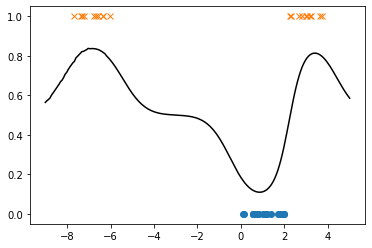

In [8]:
logit_predicted_mean = logit_function(predicted_mean).reshape(-1)
a = predicted_var.diagonal()
a = logit_function(a)
a = np.sqrt(a)
plt.figure()
plt.plot(x_0,[0]*x_0.shape[0],'o')
plt.plot(x_1,[1]*x_1.shape[0],'x')
plt.plot(x_star.reshape(-1),logit_predicted_mean,color='k')
#plt.fill_between(x_star.reshape(-1), (logit_predicted_mean-a),(logit_predicted_mean+a),alpha=0.2,color='r')
plt.show()

### Expectation Propagation

In [9]:
import scipy.stats
NormalDistribution=scipy.stats.norm(0, 1)

In [10]:
error = 100
mu = np.zeros((data.shape[0],1))
sigma = K.diagonal()

mu_tilda = np.zeros((data.shape[0],1))
sigma_tilda = np.ones(data.shape[0])

mu_tilda_new = np.zeros((data.shape[0],1))
sigma_tilda_new = np.ones(data.shape[0])

sigma_minus = np.zeros(data.shape[0])
mu_minus = np.zeros(data.shape[0])

sigma_hat = np.zeros(data.shape[0])
mu_hat = np.zeros(data.shape[0])
while error>1e-6:
    for i in range(0,data.shape[0]):
        sigma_minus[i] = 1/(sigma[i]**(-2) - sigma_tilda[i]**(-2))
        mu_minus[i] = sigma_minus[i]*(sigma[i]**(-2)*mu[i]-sigma_tilda[i]**(-2)*mu_tilda[i])
        z = (target[i]*mu_minus[i])/math.sqrt(1+sigma_minus[i]**2)
        mu_hat[i] = mu_minus[i] + (NormalDistribution.pdf(z)*target[i]*sigma_minus[i]**2) \
                                    /(NormalDistribution.cdf(z)*math.sqrt(1+sigma_minus[i]**2))
        sigma_hat[i] = sigma_minus[i]**(-2) - sigma_minus[i]**(4)*NormalDistribution.pdf(z)/ \
                            ((1+sigma_minus[i]**(2))+NormalDistribution.cdf(z))* \
                             (z+NormalDistribution.pdf(z)/NormalDistribution.cdf(z))
        sigma_tilda_new[i] = 1/(sigma_hat[i]**(-2)-sigma_minus[i]**(-2))
        mu_tilda_new[i] = sigma_tilda_new[i]**(2)*(sigma_hat[i]**(-2)*mu_hat[i] - sigma_minus[i]**(-2)*mu_minus[i])
    error = np.sum(np.abs(sigma_tilda_new-sigma_tilda))+ np.sum(np.abs(mu_tilda_new-mu_tilda))
    sigma_tilda = sigma_tilda_new
    mu_tilda = mu_tilda_new
    temp = np.zeros((data.shape[0],data.shape[0]))
    np.fill_diagonal(temp,sigma_tilda.tolist())
    sigma = np.linalg.inv(K_inv + np.linalg.inv(temp))
    mu = np.matmul(np.matmul(sigma,np.linalg.inv(temp)),mu_tilda)
    sigma= sigma.diagonal()
    print(error)

6347.168744465839
0.0


array([[ 2.55618115e-01],
       [ 1.70201068e-01],
       [ 1.34867758e-01],
       [ 1.18733815e-01],
       [ 2.91144012e-01],
       [ 1.77171137e-01],
       [ 2.01055669e-01],
       [ 2.55124674e-01],
       [ 6.08117761e-01],
       [ 6.22698998e-01],
       [ 2.98399981e-01],
       [ 1.15389517e-01],
       [ 1.20284311e-01],
       [ 1.61070287e-01],
       [ 1.28512370e-01],
       [ 1.48166758e-01],
       [ 2.25573065e-01],
       [ 1.59567743e-01],
       [ 2.98710960e-01],
       [ 1.28840482e-01],
       [-9.26740245e-02],
       [-1.88419357e-01],
       [-1.64657134e-01],
       [ 1.49405214e+00],
       [ 5.29357660e-01],
       [-4.53550850e-01],
       [-5.11809313e-01],
       [-8.00201990e-02],
       [ 5.37734649e-01],
       [ 5.54282083e-04],
       [-6.88152732e-01],
       [-7.70798152e-01],
       [-6.81331707e-01],
       [-7.48246701e-01],
       [-6.99819535e-01],
       [-8.99063042e-01],
       [-7.87098204e-01],
       [-7.55350852e-01],
       [-7.4

In [20]:
Sigma_tilda = np.zeros((data.shape[0],data.shape[0]))
np.fill_diagonal(Sigma_tilda,sigma_tilda.tolist())
predicted_mean = np.matmul(np.matmul(k_star.T,np.linalg.inv(K+Sigma_tilda)),mu_tilda)
predicted_var = covariance_function(x_star,x_star,1,1,0.1) - np.matmul(np.matmul(k_star.T,\
                                                            np.linalg.inv(K+Sigma_tilda)),k_star)
a = predicted_mean / np.sqrt(1+predicted_var)
pi_star = NormalDistribution.cdf(predicted_mean)#.diagonal()

In [21]:
predicted_mean

array([[-2.99009737e-01],
       [-2.80197737e-01],
       [-3.56076336e-01],
       [-4.41101233e-01],
       [-4.11954738e-01],
       [-3.98438573e-01],
       [-4.45267447e-01],
       [-4.94952890e-01],
       [-4.41396006e-01],
       [-4.63717550e-01],
       [-5.79728171e-01],
       [-6.70532489e-01],
       [-6.82418737e-01],
       [-5.96337413e-01],
       [-6.98870503e-01],
       [-6.39078259e-01],
       [-6.95307055e-01],
       [-6.65978533e-01],
       [-7.34005044e-01],
       [-7.70923332e-01],
       [-7.66719460e-01],
       [-7.50828966e-01],
       [-7.60727874e-01],
       [-5.98522838e-01],
       [-5.62418508e-01],
       [-7.63220133e-01],
       [-7.71176781e-01],
       [-7.90159756e-01],
       [-5.56177074e-01],
       [-8.54109281e-01],
       [-7.24519023e-01],
       [-7.50209601e-01],
       [-7.13163401e-01],
       [-7.48954077e-01],
       [-7.19315918e-01],
       [-7.84878820e-01],
       [-7.38231593e-01],
       [-7.34886496e-01],
       [-7.0

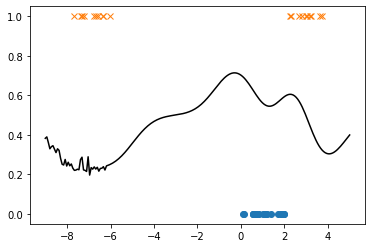

In [22]:
plt.figure()
plt.plot(x_0,[0]*x_0.shape[0],'o')
plt.plot(x_1,[1]*x_1.shape[0],'x')
plt.plot(x_star.reshape(-1),pi_star,color='k')
#plt.fill_between(x_star.reshape(-1), (logit_predicted_mean-a),(logit_predicted_mean+a),alpha=0.2,color='r')
plt.show()